In [1]:
#importing the libraries and reading the data
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random



In [2]:
#reading the data
df = pd.read_csv('spotify_Song_Dataset/dataset.csv')

#removing the row with null values
df = df.dropna()

#dropping duration and explicit columns 
df = df.drop(['duration_ms','explicit','mode','liveness','loudness','time_signature','key'],axis=1)

df.rename(columns={'Unnamed: 0': 'song_id'}, inplace=True)

print(df.columns)

df.head(5)


Index(['song_id', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'track_genre'],
      dtype='object')


song_id                track_id                 artists  \
0        0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1        1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2        2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3        3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4        4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  danceability  energy  speechiness  \
0                      Comedy          73         0.676  0.4610       0.1430   
1            Ghost - Acoustic          55         0.420  0.1660       0.0763   
2              To Begin Again          57         0.438  0.3590       0.0557   
3  Can't Help Falling In Love          71         0.266  0.0596       0.0363   
4                     Hold On          82         0.618  0.4430       0.0526   

   acousticness  instrumentalness  valence    tempo track_genre  
0        0.0322          0.000001    0.715   87.917    acoustic  
1        0.9240          0.000006    0.267   77.489    acoustic  
2        0.2100          0.000000    0.120   76.332    acoustic  
3        0.9050          0.000071    0.143  181.740    acoustic  
4        0.4690          0.000000    0.167  119.949    acoustic

# Correlation Matrix 

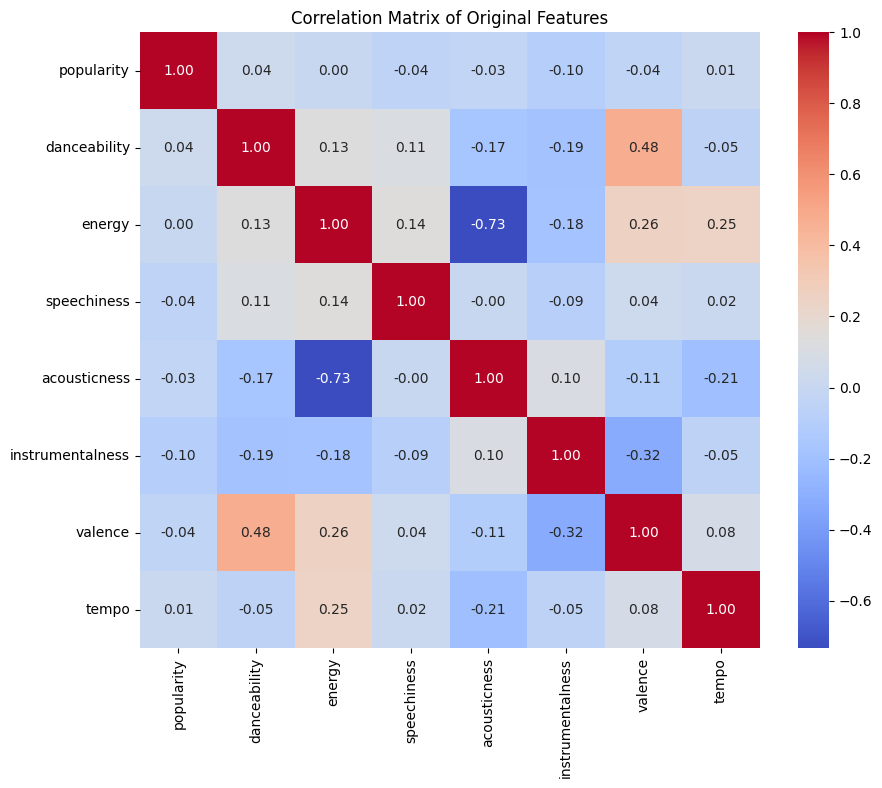

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your original DataFrame
# Select the relevant numerical features for correlation analysis
numerical_features = ['popularity', 'danceability', 'energy', 'speechiness', 
                      'acousticness', 'instrumentalness', 'valence', 'tempo']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Original Features')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Define the continuous audio features and popularity for scaling
features_to_scale = ['popularity', 'danceability', 'energy', 'acousticness', 'valence', 'tempo']

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
scaled_features = scaler.fit_transform(df[features_to_scale])

# Convert the scaled features back to a DataFrame and scale them to 0-100
df_scaled = pd.DataFrame(scaled_features * 100, columns=features_to_scale)

# Add the original identification and categorical columns back to the DataFrame
df_scaled['song_id'] = df['song_id']
df_scaled['track_id'] = df['track_id']
df_scaled['artist_name'] = df['artists'].fillna('')  # Fill NaN with an empty string
df_scaled['track_name'] = df['track_name']
df_scaled['album_name'] = df['album_name'].fillna('')  # Fill NaN with an empty string
df_scaled['track_genre'] = df['track_genre'].fillna('')  # Fill NaN with an empty string

# Recompute z-scores and handle extreme outliers (only for the continuous features)
z_scores = stats.zscore(df_scaled[features_to_scale])
outliers = (z_scores > 5) | (z_scores < -5)
df_scaled = df_scaled[(~outliers).all(axis=1)]

# Handling missing data by dropping any rows with NaN values
df_scaled = df_scaled.dropna()

# Re-scaling the continuous features after handling outliers (optional step)
scaled_features = scaler.fit_transform(df_scaled[features_to_scale])
df_scaled[features_to_scale] = scaled_features * 100

# Reordering the DataFrame columns to have song information first
df_scaled = df_scaled[['song_id', 'track_id', 'artist_name', 'track_name', 'album_name', 'track_genre', 
                       'popularity', 'energy', 'acousticness', 'valence', 'tempo']]

print(df_scaled.columns)

# Display the final processed DataFrame
df_scaled.head(5)


Index(['song_id', 'track_id', 'artist_name', 'track_name', 'album_name',
       'track_genre', 'popularity', 'energy', 'acousticness', 'valence',
       'tempo'],
      dtype='object')


song_id                track_id             artist_name  \
0      0.0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1.0  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2.0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3.0  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4.0  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                   track_name  \
0                      Comedy   
1            Ghost - Acoustic   
2              To Begin Again   
3  Can't Help Falling In Love   
4                     Hold On   

                                          album_name track_genre  popularity  \
0                                             Comedy    acoustic        73.0   
1                                   Ghost (Acoustic)    acoustic        55.0   
2                                     To Begin Again    acoustic        57.0   
3  Crazy Rich Asians (Original Motion Picture Sou...    acoustic        71.0   
4                                            Hold On    acoustic        82.0   

   energy  acousticness    valence      tempo  
0   46.10      3.232932  71.859296  36.124534  
1   16.60     92.771084  26.834171  31.839735  
2   35.90     21.084337  12.060302  31.364331  
3    5.96     90.863454  14.371859  74.675805  
4   44.30     47.088353  16.783920  49.286278

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder (no need for sparse argument here)
onehot_encoder = OneHotEncoder()

# Fit and transform the 'track_genre' column to one-hot encoded format
genre_encoded = onehot_encoder.fit_transform(df_scaled[['track_genre']])

# Convert the sparse matrix to a dense array if desired
# genre_encoded = genre_encoded.toarray()

# Convert the encoded array to a DataFrame with appropriate column names
genre_encoded_df = pd.DataFrame(genre_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['track_genre']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_scaled = pd.concat([df_scaled, genre_encoded_df], axis=1)

# Display the DataFrame columns to ensure the one-hot encoded genre columns are added
print(df_scaled.columns)

# Display the first 5 rows of the updated DataFrame to verify the changes
df_scaled.head(5)


Index(['song_id', 'track_id', 'artist_name', 'track_name', 'album_name',
       'track_genre', 'popularity', 'energy', 'acousticness', 'valence',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=126)


song_id                track_id             artist_name  \
0      0.0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1.0  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2.0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3.0  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4.0  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                   track_name  \
0                      Comedy   
1            Ghost - Acoustic   
2              To Begin Again   
3  Can't Help Falling In Love   
4                     Hold On   

                                          album_name track_genre  popularity  \
0                                             Comedy    acoustic        73.0   
1                                   Ghost (Acoustic)    acoustic        55.0   
2                                     To Begin Again    acoustic        57.0   
3  Crazy Rich Asians (Original Motion Picture Sou...    acoustic        71.0   
4                                            Hold On    acoustic        82.0   

   energy  acousticness    valence  ...  track_genre_spanish  \
0   46.10      3.232932  71.859296  ...                  0.0   
1   16.60     92.771084  26.834171  ...                  0.0   
2   35.90     21.084337  12.060302  ...                  0.0   
3    5.96     90.863454  14.371859  ...                  0.0   
4   44.30     47.088353  16.783920  ...                  0.0   

   track_genre_study  track_genre_swedish  track_genre_synth-pop  \
0                0.0                  0.0                    0.0   
1                0.0                  0.0                    0.0   
2                0.0                  0.0                    0.0   
3                0.0                  0.0                    0.0   
4                0.0                  0.0                    0.0   

   track_genre_tango  track_genre_techno  track_genre_trance  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   track_genre_trip-hop  track_genre_turkish  track_genre_world-music  
0                   0.0                  0.0                      0.0  
1                   0.0                  0.0                      0.0  
2                   0.0                  0.0                      0.0  
3                   0.0                  0.0                      0.0  
4                   0.0                  0.0                      0.0  

[5 rows x 126 columns]

## Polynomial features 

In [25]:
print(df_scaled.info())

#duplicate values
duplicate = df_scaled.duplicated()

print(duplicate.sum())

#dropping duplicate values
df_scaled = df_scaled.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 65900
Columns: 126 entries, song_id to track_genre_world-music
dtypes: float64(121), object(5)
memory usage: 110.5+ MB
None
0


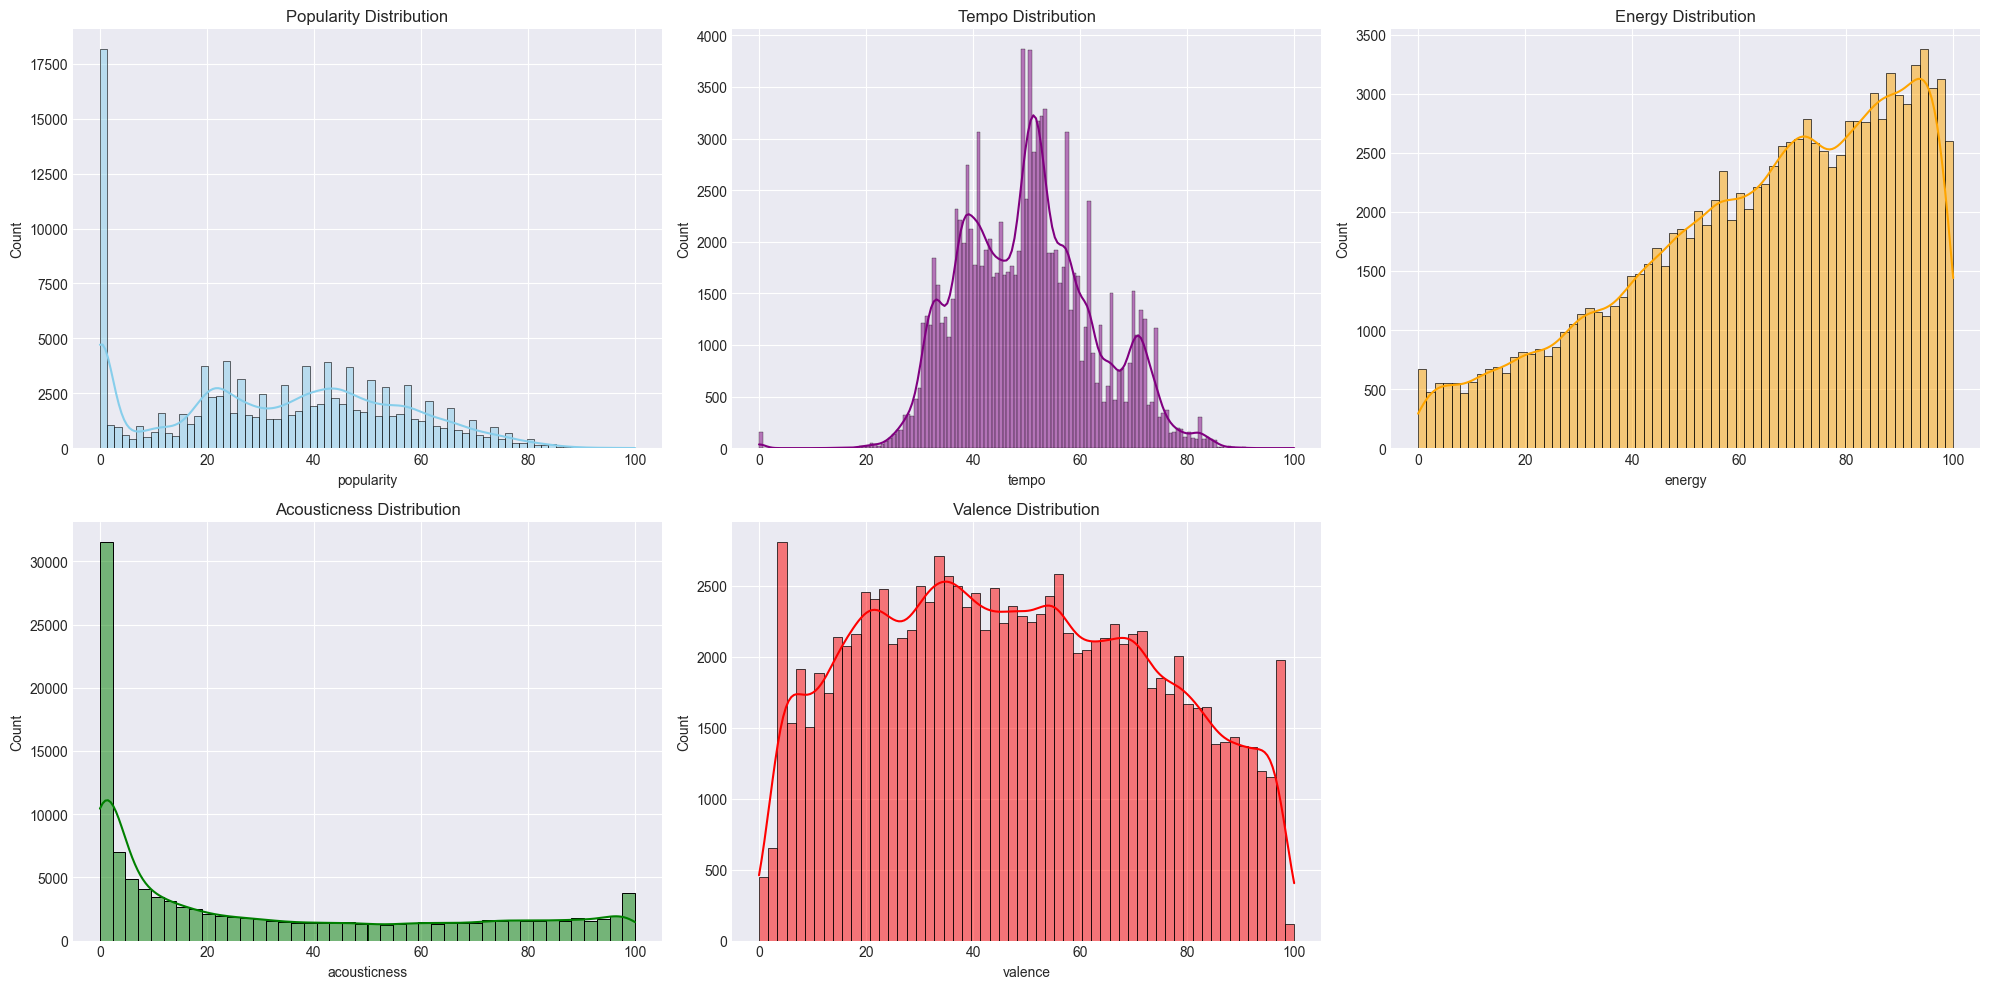

Popularity Range: 0.0 - 100.0
Tempo Range: 0.0 - 100.0
Energy Range: 0.0 - 100.0
Acousticness Range: 0.0 - 100.0
Valence Range: 0.0 - 100.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distributions of the continuous features
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot the distribution of popularity
sns.histplot(df_scaled['popularity'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Popularity Distribution')

# Plot the distribution of tempo
sns.histplot(df_scaled['tempo'], kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Tempo Distribution')

# Plot the distribution of energy
sns.histplot(df_scaled['energy'], kde=True, color='orange', ax=axes[0, 2])
axes[0, 2].set_title('Energy Distribution')

# Plot the distribution of acousticness
sns.histplot(df_scaled['acousticness'], kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Acousticness Distribution')

# Plot the distribution of valence
sns.histplot(df_scaled['valence'], kde=True, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Valence Distribution')

# Remove the last subplot (unused)
fig.delaxes(axes[1, 2])

# Display the plots
plt.tight_layout()
plt.show()

# Printing the range of each audio feature
print('Popularity Range:', df_scaled['popularity'].min(), '-', df_scaled['popularity'].max())
print('Tempo Range:', df_scaled['tempo'].min(), '-', df_scaled['tempo'].max())
print('Energy Range:', df_scaled['energy'].min(), '-', df_scaled['energy'].max())
print('Acousticness Range:', df_scaled['acousticness'].min(), '-', df_scaled['acousticness'].max())
print('Valence Range:', df_scaled['valence'].min(), '-', df_scaled['valence'].max())


In [27]:
#saving the final dataset
final_df = df_scaled
final_df.to_csv('spotify_Song_Dataset/final_dataset.csv',index=False)

print(final_df.columns)


Index(['song_id', 'track_id', 'artist_name', 'track_name', 'album_name',
       'track_genre', 'popularity', 'energy', 'acousticness', 'valence',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=126)


In [13]:
import pandas as pd

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Finding all the songs by The Weeknd and showing artist name encoded
weeknd_songs = final_df[final_df['artist_name'].str.contains('The Weeknd')]
print(weeknd_songs[['track_name', 'artist_name', 'artist_name_encoded']])

# Printing total number of songs with The Weeknd name in artist name
print(weeknd_songs.shape[0])

                                               track_name  \
3553                                    tears in the club   
3556                                    tears in the club   
3557                                    tears in the club   
3567                                    tears in the club   
3568                                    tears in the club   
3578                                    tears in the club   
3751                                             Odd Look   
15071          Make It (feat. The Weeknd) [DJAmg Remixer]   
17000                 Lost in the Fire (feat. The Weeknd)   
20100                                           You Right   
20412                   Moth To A Flame (with The Weeknd)   
20715                                      Or Nah - Remix   
20724                                      Or Nah - Remix   
20900                                      Love Me Harder   
30106                   Moth To A Flame (with The Weeknd)   
30255                   

In [37]:
#dropping the nan values
final_df = final_df.dropna()

#checking for nan values
print(final_df.isnull().sum())

song_id                    0
track_id                   0
artist_name                0
track_name                 0
album_name                 0
                          ..
track_genre_techno         0
track_genre_trance         0
track_genre_trip-hop       0
track_genre_turkish        0
track_genre_world-music    0
Length: 126, dtype: int64


In [47]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Define the features for similarity calculation, excluding popularity and artist names
features = ['energy', 'acousticness', 'valence', 'tempo'] + list(df_scaled.filter(like='track_genre_encoded').columns)

# Define the weighted importance for each feature (weights can be adjusted as needed)
feature_weights = {
    'energy': 1.0,
    'acousticness': 1.0,
    'valence': 1.0,
    'tempo': 1.0,
}

# Add weights for genre one-hot encoded features
for genre_feature in df_scaled.filter(like='track_genre_encoded').columns:
    feature_weights[genre_feature] = 100.0  # Higher weight for genre importance

def recommend_songs(user_songs, df, features, feature_weights, top_n=0, similarity_threshold=0.0):
    """
    Recommend songs based on a list of user input songs using cosine similarity.
    """
    # Ensure that the DataFrame is copied to avoid modifying the original data
    df_copy = df.copy()

    # Apply feature weights to the selected features
    for feature in features:
        df_copy[feature] = df_copy[feature] * feature_weights.get(feature, 1.0)
    
    # Filter the dataset to get the user's songs
    user_songs_df = df_copy[df_copy['song_id'].isin(user_songs)]
    
    # Compute cosine similarity between all songs in the dataset and the user's songs
    similarity_matrix = cosine_similarity(df_copy[features], user_songs_df[features])
    
    # Aggregate the similarity scores across all user songs
    aggregated_similarities = similarity_matrix.mean(axis=1)
    
    # Add the similarity scores to the dataframe
    df_copy['similarity'] = aggregated_similarities
    
    # Exclude the user's input songs from the recommendations
    recommendations = df_copy[~df_copy['song_id'].isin(user_songs)]
    
    # If a similarity threshold is provided, filter and then sort by similarity and popularity
    if similarity_threshold > 0.0:
        # Filter recommendations based on similarity threshold
        recommendations = recommendations[recommendations['similarity'] >= similarity_threshold]
        
        # Sort first by similarity, then by popularity
        recommendations = recommendations.sort_values(by=['popularity', 'similarity'], ascending=[False, False])
        
        # If top_n is provided, get the top N results
        if top_n > 0:
            recommendations = recommendations.head(top_n)
    else:
        # If no similarity threshold is provided, sort by similarity first, then popularity
        recommendations = recommendations.sort_values(by=['similarity', 'popularity'], ascending=[False, False])
        
        # If top_n is provided, get the top N results
        if top_n > 0:
            recommendations = recommendations.head(top_n)
    
    return recommendations

# Example usage:
user_songs = [67016, 91000, 81004, 17000, 20414, 81000, 81074, 81109, 20652, 91016, 91017, 91018, 51150, 51503, 56064, 33012, 57162, 53050, 67351, 51450, 94632, 51500, 53055]
recommended_songs = recommend_songs(user_songs, final_df, features, feature_weights, top_n=0, similarity_threshold=0.9)

# Printing the user songs
print("User Songs: \n")
for song_id in user_songs:
    song = df_scaled[df_scaled['song_id'] == song_id]
    print(f"Song ID: {song_id}")
    print(f"Track Name: {song['track_name'].values[0]}")
    print(f"Artist Name: {song['artist_name'].values[0]}")
    print(f"Album Name: {song['album_name'].values[0]}\n")

# Print the recommended songs
print("Recommended Songs: \n")
for index, row in recommended_songs.iterrows():
    print(f"Song ID: {row['song_id']}, Similarity: {row['similarity']:0.4f}")
    print(f"Track Name: {row['track_name']}")
    print(f"Artist Name: {row['artist_name']}")
    print(f"Album Name: {row['album_name']}\n")


User Songs: 

Song ID: 67016
Track Name: MIA
Artist Name: Bad Bunny;Drake
Album Name: Today's Party Hits

Song ID: 91000
Track Name: Sex, Drugs, Etc.
Artist Name: Beach Weather
Album Name: Chit Chat

Song ID: 81004
Track Name: Starboy
Artist Name: The Weeknd;Daft Punk
Album Name: Starboy

Song ID: 17000
Track Name: Lost in the Fire (feat. The Weeknd)
Artist Name: Gesaffelstein;The Weeknd
Album Name: Hyperion

Song ID: 20414
Track Name: Eastside (with Halsey & Khalid)
Artist Name: benny blanco;Halsey;Khalid
Album Name: FRIENDS KEEP SECRETS

Song ID: 81000
Track Name: Blinding Lights
Artist Name: The Weeknd
Album Name: After Hours

Song ID: 81074
Track Name: The Hills
Artist Name: The Weeknd
Album Name: Drippy Drippy

Song ID: 81109
Track Name: After Hours
Artist Name: The Weeknd
Album Name: Halloween Party 2022

Song ID: 20652
Track Name: Gimme More
Artist Name: Britney Spears
Album Name: Blackout

Song ID: 91016
Track Name: Whatever It Takes
Artist Name: Imagine Dragons
Album Name: Evo

# VADER SENTIMENT ANALYSIS

In [12]:
def analyze_user_emotion(user_text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(user_text)
    
    # Determine the emotion based on the sentiment scores
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

### Environment for the reinforcement learning model

In [14]:
def recommend_songs_based_on_emotion(user_songs, df, features, user_emotion, top_n=20):
    """
    Recommend songs considering user's emotional state.
    """
    
    # Get the cosine similarity-based recommendations
    recommended_songs = recommend_songs(user_songs, df, features, top_n)
    
    # Incorporate the user's emotion into the recommendation strategy
    # For simplicity, assume we have predefined weights for each emotion
    emotion_weights = {
        'positive': 1.0,
        'neutral': 0.5,
        'negative': -1.0
    }
    
    # Adjust the similarity score based on emotion
    recommended_songs['adjusted_similarity'] = recommended_songs['similarity'] * emotion_weights[user_emotion]
    
    # Sort again based on the adjusted similarity
    recommended_songs = recommended_songs.sort_values(by='adjusted_similarity', ascending=False)
    
    return recommended_songs.head(top_n)


Not bad I am feeling good but a little worried about some stuff but I guess it will get better soon

In [17]:
import numpy as np
import random
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

class RecommendationAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.q_table = np.zeros((state_size, action_size))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore: random song
        return np.argmax(self.q_table[state])  # Exploit: best known song

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return  # Do nothing if not enough samples in memory
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.max(self.q_table[next_state])
            self.q_table[state, action] += self.learning_rate * (target - self.q_table[state, action])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Example usage
state_size = 3  # Three possible emotions: positive, neutral, negative
action_size = len(df_scaled)  # Number of songs in the dataset

# Initialize the RL agent
agent = RecommendationAgent(state_size, action_size)

# Initialize the user_songs playlist with some initial songs
user_songs = [910433, 67016, 91000, 81004, 17000, 20414, 81000, 81074, 81109, 20652, 91016, 91017, 91018, 51150, 51503, 56064, 33012, 57162, 53050, 67351, 51450, 94632, 51500, 53055]

# Interactive loop for user interaction
for e in range(10):  # Number of interactions (can be adjusted)
    # Get user input for emotion analysis
    user_text = input("How are you feeling today? ")
    user_emotion = analyze_user_emotion(user_text)
    state = ['positive', 'neutral', 'negative'].index(user_emotion)
    
    # RL agent decides which song to recommend based on the current state (emotion)
    action = agent.act(state)
    
    # Get the top N recommendations based on the selected song and user emotion
    recommended_songs = recommend_songs_based_on_emotion(user_songs=user_songs, df=df_scaled, features=features, user_emotion=user_emotion, top_n=20)
    
    # Occasionally recommend a random song from the dataset to introduce new interests
    if np.random.rand() < 0.1:  # 10% chance to recommend a random song
        random_action = random.randrange(action_size)
        print(f"Exploration Recommendation (Random Song): {df_scaled.iloc[random_action]['track_name']} by {df_scaled.iloc[random_action]['artist_name']}")
    
    # Show the recommendations to the user and get feedback for each song
    print("Top 20 Recommendations based on your current mood:")
    for index, row in recommended_songs.iterrows():
        print(f"{row['track_name']} by {row['artist_name']} (Similarity: {row['adjusted_similarity']:0.4f})")
        feedback = input("Did you like this recommendation? (yes/no): ")
        reward = 1 if feedback.lower() == "yes" else -1
        
        # If the song is liked, ask if the user wants to add it to their playlist
        if reward == 1:
            add_to_playlist = input("Would you like to add this song to your playlist? (yes/no): ")
            if add_to_playlist.lower() == "yes":
                user_songs.append(row.name)
        
        # Simulate the next state: how the user's emotion changes after interacting with the recommendation
        next_state = np.random.randint(0, state_size)
        done = False  # The episode continues indefinitely
        
        # Store the experience in the agent's memory
        agent.remember(state, row.name, reward, next_state, done)
    
    # Train the agent with replay (experience replay)
    agent.replay(batch_size=32)
    
    #print the user songs
    print("\nYour Playlist:", user_songs)
    print("Your Playlist:")
    for song_id in user_songs:
        song_details = df_scaled[df_scaled['song_id'] == song_id].iloc[0]
        print(f"{song_details['track_name']} by {song_details['artist_name']}")

    print("\n--- End of Interaction ---\n")


Top 20 Recommendations based on your current mood:
Gol by Malt (Similarity: 0.9986)
Cold Little Heart by Michael Kiwanuka (Similarity: 0.9986)
Alone for Christmas by Ty Dolla $ign;Kiana Ledé (Similarity: 0.9986)
Ego Death by Ty Dolla $ign;Kanye West;FKA twigs;Skrillex (Similarity: 0.9986)
when we were 16 by Rxseboy;Powfu;Mishaal (Similarity: 0.9986)
Laurel Canyon Night Drive - Jody Wisternoff Extended Breaking Sticks Remix by BT;Jody Wisternoff (Similarity: 0.9986)
Hola by Serhat Durmus (Similarity: 0.9986)
Rest Of Our Lives by Ben Gold (Similarity: 0.9986)
28 Reasons by SEULGI (Similarity: 0.9986)
Vesúvio by Djavan (Similarity: 0.9986)
Vatten by Robert Broberg (Similarity: 0.9986)
China by Anuel AA;Daddy Yankee;KAROL G;J Balvin;Ozuna (Similarity: 0.9986)
Risk by Motive (Similarity: 0.9986)
The Long Way by Avanti Nagral (Similarity: 0.9986)
Kendimce by Sezen Aksu (Similarity: 0.9986)
Kuytu Köşelerde by Şanışer (Similarity: 0.9986)
fanus by Mavi;Defa (Similarity: 0.9986)
Te Assumo - Ao 

IndexError: single positional indexer is out-of-bounds